In [4]:
import os
import pandas as pd
import numpy as np

DIR = 'data/processed_landmarks'
files = sorted([f for f in os.listdir(DIR) if f.endswith('.csv')])
all_dfs = []
for file in files:
    df = pd.read_csv(os.path.join(DIR, file))
    # print(f"Procesando {file} con {len(df)} frames")
    df['source_file'] = file  # Para trazar origen
    all_dfs.append(df)

df_full = pd.concat(all_dfs, ignore_index=True)
print(f"Total de frames: {len(df_full)}")
df_full.head()


Total de frames: 6197


,frame,x0,y0,z0,v0,x1,y1,z1,v1,x2,...,v30,x31,y31,z31,v31,x32,y32,z32,v32,source_file
0,0,-0.144198,-0.000324,-0.337891,0.999594,-0.153203,-0.007916,-0.331676,0.998742,-0.153787,...,0.911701,0.163354,-0.032794,0.186392,0.978788,0.160524,0.035730,0.241431,0.961426,20250520_161412.csv
1,1,-0.144288,0.000722,-0.288722,0.999561,-0.152561,-0.006726,-0.280630,0.998548,-0.152881,...,0.889185,0.160397,-0.044820,0.144313,0.968278,0.160039,0.031166,0.178694,0.952721,20250520_161412.csv
2,2,-0.144315,0.001794,-0.250552,0.999594,-0.152061,-0.005478,-0.241029,0.998644,-0.152197,...,0.883629,0.158127,-0.053653,0.112037,0.966002,0.159697,0.028036,0.131303,0.952828,20250520_161412.csv
3,3,-0.144278,0.002893,-0.223382,0.999625,-0.151704,-0.004174,-0.212871,0.998735,-0.151733,...,0.879832,0.156543,-0.059293,0.089565,0.965445,0.159499,0.026340,0.099257,0.953933,20250520_161412.csv
4,4,-0.143846,0.004935,-0.206181,0.999656,-0.151542,-0.002196,-0.195224,0.998835,-0.151563,...,0.878314,0.156174,-0.058166,0.085038,0.965565,0.160368,0.027372,0.095929,0.955340,20250520_161412.csv


<Axes: title={'center': 'Desviación estándar por coordenada'}>

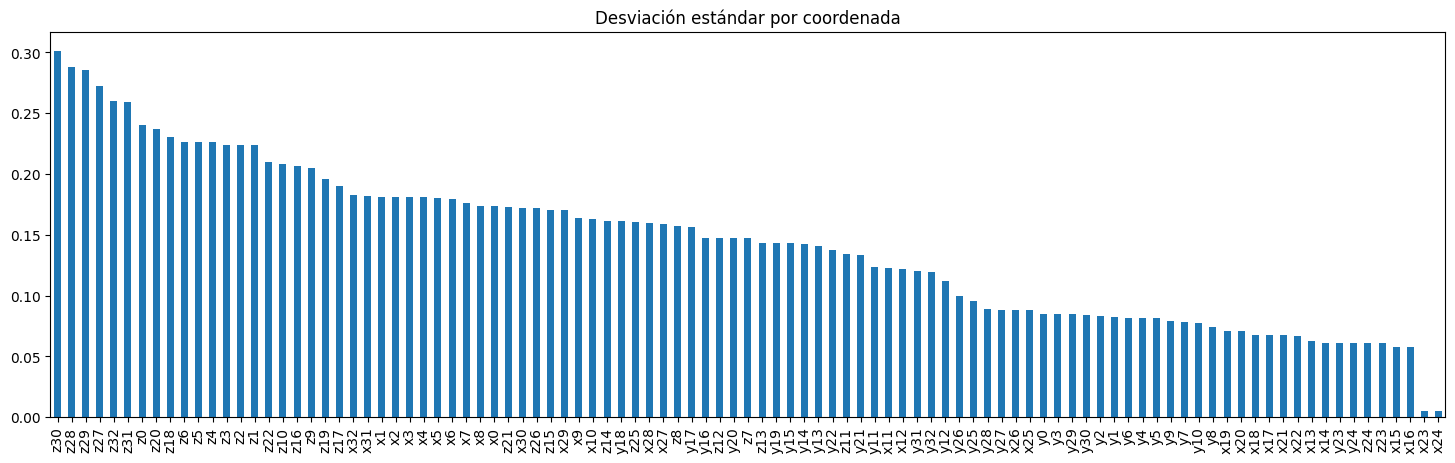

In [ ]:
stds = {}
for i in range(33):
    stds[f'x{i}'] = df_full[f'x{i}'].std()
    stds[f'y{i}'] = df_full[f'y{i}'].std()
    stds[f'z{i}'] = df_full[f'z{i}'].std()

df_std = pd.Series(stds).sort_values(ascending=False)
df_std.plot(kind='bar', figsize=(18, 5), title='Desviación estándar por coordenada')



<Axes: title={'center': 'Visibilidad promedio por punto'}>

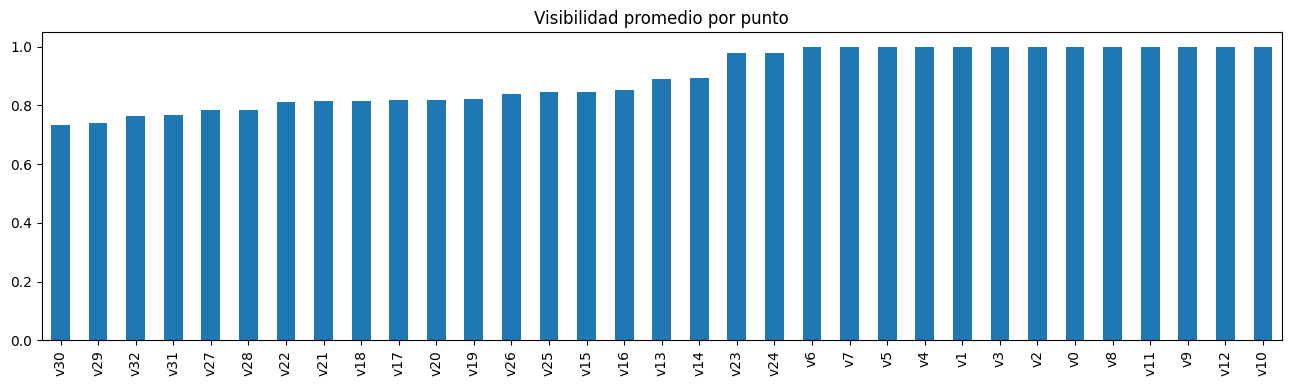

In [5]:
vis = {}
for i in range(33):
    vis[f'v{i}'] = df_full[f'v{i}'].mean()

df_vis = pd.Series(vis).sort_values()
df_vis.plot(kind='bar', figsize=(16, 4), title='Visibilidad promedio por punto')


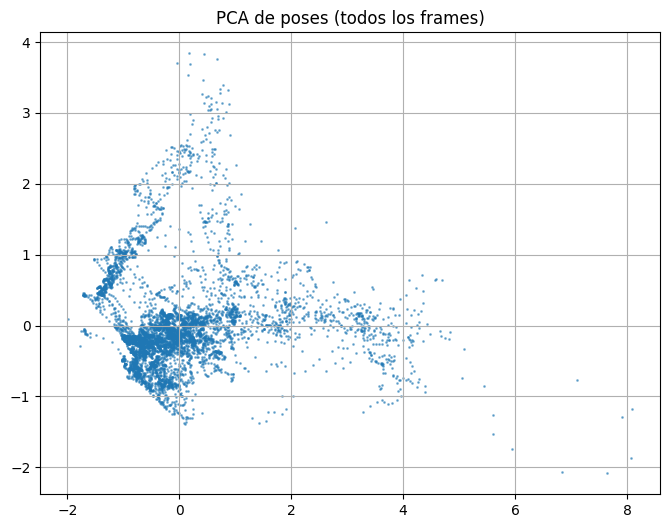

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

coords = df_full[[f'{axis}{i}' for i in range(33) for axis in 'xyz']]
pca = PCA(n_components=2)
proj = pca.fit_transform(coords.fillna(0))

plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], s=1, alpha=0.5)
plt.title('PCA de poses (todos los frames)')
plt.grid()
plt.show()


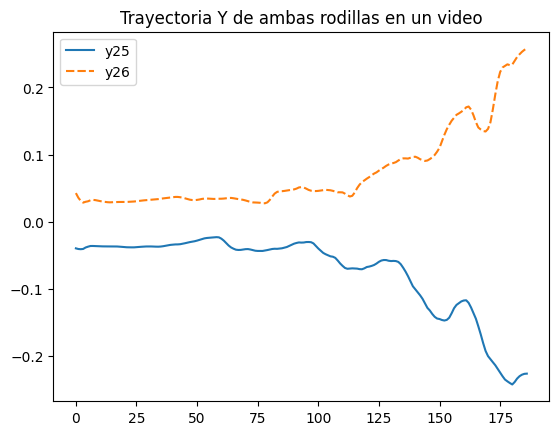

In [7]:
import seaborn as sns

df_sample = df_full[df_full['source_file'] == files[0]]
sns.lineplot(data=df_sample[[f'y25', f'y26']])
plt.title('Trayectoria Y de ambas rodillas en un video')
plt.show()


Text(0.5, 1.0, 'Inclinación lateral del torso (hombro izq - der)')

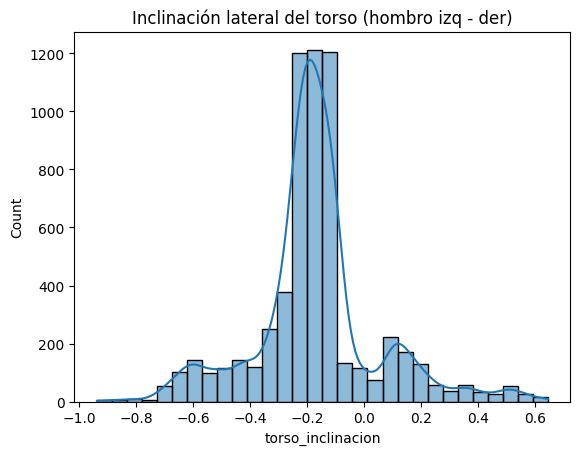

In [8]:
df_full['torso_inclinacion'] = df_full['y11'] - df_full['y12']
sns.histplot(df_full['torso_inclinacion'], bins=30, kde=True)
plt.title('Inclinación lateral del torso (hombro izq - der)')
